# Problem statement: Analyzing the attrition rate of the company

Company want to know what changes they should make to their workplace, in order to get most of their employees to stay. Also, they want to know which of these variables is most important and needs to be addressed right away.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing our dataset
employee_df = pd.read_csv('C:\\Users\\user\\Downloads\\Python Problems\\Numpy,Pandas &Visualizaation\\Files_Dataset\\general_data.csv')
pd.options.display.max_columns= None #because all columns is not showing after loading the dataset

In [3]:
employee_df.head()

,EmployeeID,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,1,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,2,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,3,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,4,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,5,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


# Data Cleaning

***Delete the column "EmployeeID"....it will not make any sense to our analysis***

In [4]:
del employee_df['EmployeeID']

In [5]:
employee_df.tail(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
4400,37,No,Travel_Rarely,Research & Development,22,5,Medical,1,Female,2,Manufacturing Director,Married,30550,2.0,Y,14,8,3,17.0,3,3,0,2,3.0,1.0,2.0,3,3
4401,45,No,Travel_Frequently,Sales,21,1,Marketing,1,Male,3,Research Scientist,Married,22890,4.0,Y,13,8,0,9.0,3,3,0,2,1.0,3.0,3.0,2,3
4402,37,Yes,Travel_Frequently,Sales,2,3,Marketing,1,Male,1,Laboratory Technician,Divorced,40010,6.0,Y,11,8,1,17.0,2,1,0,0,1.0,3.0,3.0,3,3
4403,39,No,Travel_Frequently,Research & Development,22,3,Medical,1,Female,1,Manufacturing Director,Single,129650,0.0,Y,19,8,1,20.0,2,19,11,8,3.0,3.0,3.0,3,3
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,Female,2,Human Resources,Single,35390,1.0,Y,18,8,0,6.0,2,6,1,5,3.0,4.0,3.0,2,3
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,Female,1,Research Scientist,Single,60290,3.0,Y,17,8,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,Male,1,Laboratory Technician,Divorced,26790,2.0,Y,15,8,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,2,Sales Executive,Married,37020,0.0,Y,20,8,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,Male,1,Laboratory Technician,Divorced,23980,0.0,Y,14,8,1,10.0,2,9,7,8,4.0,1.0,3.0,2,3
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,Male,2,Laboratory Technician,Divorced,54680,0.0,Y,12,8,0,NaN,6,21,3,9,1.0,3.0,NaN,4,3


In [6]:
employee_df.sample

<bound method NDFrame.sample of       Age Attrition     BusinessTravel              Department  \
0      51        No      Travel_Rarely                   Sales   
1      31       Yes  Travel_Frequently  Research & Development   
2      32        No  Travel_Frequently  Research & Development   
3      38        No         Non-Travel  Research & Development   
4      32        No      Travel_Rarely  Research & Development   
...   ...       ...                ...                     ...   
4405   42        No      Travel_Rarely  Research & Development   
4406   29        No      Travel_Rarely  Research & Development   
4407   25        No      Travel_Rarely  Research & Development   
4408   42        No      Travel_Rarely                   Sales   
4409   40        No      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  Gender  \
0                    6          2  Life Sciences              1  Female   
1                   10   

In [7]:
employee_df.sample(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
4142,29,No,Travel_Rarely,Research & Development,5,3,Medical,1,Male,2,Sales Representative,Single,75530,1.0,Y,19,8,0,5.0,3,5,0,4,4.0,1.0,1.0,3,3
1205,31,No,Non-Travel,Research & Development,8,4,Life Sciences,1,Female,4,Sales Executive,Single,147320,0.0,Y,12,8,0,10.0,3,9,1,7,2.0,1.0,3.0,3,3
2189,34,No,Non-Travel,Sales,1,2,Life Sciences,1,Male,2,Research Scientist,Divorced,86210,1.0,Y,17,8,1,5.0,1,5,0,0,1.0,3.0,3.0,3,3
4100,38,No,Travel_Frequently,Research & Development,1,4,Other,1,Male,2,Research Scientist,Married,36690,2.0,Y,19,8,0,10.0,2,8,7,7,1.0,3.0,3.0,3,3
3632,31,No,Non-Travel,Research & Development,1,2,Medical,1,Male,1,Sales Executive,Divorced,195130,1.0,Y,12,8,1,10.0,1,10,9,6,4.0,3.0,2.0,2,3


In [8]:
employee_df.shape

(4410, 28)

In [9]:
employee_df.info()
#so 29 features in total, each contains 4410 data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  Over18                  

In [10]:
employee_df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


**Replacing 'attrition' and 'Over18' columns with integers.**

In [11]:
employee_df = employee_df.replace({'Attrition' : {'Yes' : 1 , 'No': 0}})
employee_df = employee_df.replace({'Over18' : {'Y' : 1 , 'N': 0}})

In [12]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,1,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,1,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,1,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,1,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,1,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


**Dealing with missing values**

In [13]:
employee_df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                       int64
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating            int64
dtype: object

In [14]:
employee_df.describe(include= "all")

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410,4410,4410.000000,4410.000000,4410,4410.0,4410,4410.000000,4410,4410,4410.000000,4391.000000,4410.0,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
unique,NaN,NaN,3,3,NaN,NaN,6,NaN,2,NaN,9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,Sales Executive,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,3129,2883,NaN,NaN,1818,NaN,2646,NaN,978,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,0.161224,NaN,NaN,9.192517,2.912925,NaN,1.0,NaN,2.063946,NaN,NaN,65029.312925,2.694830,1.0,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,0.367780,NaN,NaN,8.105026,1.023933,NaN,0.0,NaN,1.106689,NaN,NaN,47068.888559,2.498887,0.0,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,0.000000,NaN,NaN,1.000000,1.000000,NaN,1.0,NaN,1.000000,NaN,NaN,10090.000000,0.000000,1.0,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,0.000000,NaN,NaN,2.000000,2.000000,NaN,1.0,NaN,1.000000,NaN,NaN,29110.000000,1.000000,1.0,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,0.000000,NaN,NaN,7.000000,3.000000,NaN,1.0,NaN,2.000000,NaN,NaN,49190.000000,2.000000,1.0,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,0.000000,NaN,NaN,14.000000,4.000000,NaN,1.0,NaN,3.000000,NaN,NaN,83800.000000,4.000000,1.0,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000


In [15]:
employee_df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

**Dealing with missing values . we have four features in our dataset which have missing values NumCompaniesWorked,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance**

In [16]:
employee_df.isnull().sum()*100/len(employee_df)

Age                        0.000000
Attrition                  0.000000
BusinessTravel             0.000000
Department                 0.000000
DistanceFromHome           0.000000
Education                  0.000000
EducationField             0.000000
EmployeeCount              0.000000
Gender                     0.000000
JobLevel                   0.000000
JobRole                    0.000000
MaritalStatus              0.000000
MonthlyIncome              0.000000
NumCompaniesWorked         0.430839
Over18                     0.000000
PercentSalaryHike          0.000000
StandardHours              0.000000
StockOptionLevel           0.000000
TotalWorkingYears          0.204082
TrainingTimesLastYear      0.000000
YearsAtCompany             0.000000
YearsSinceLastPromotion    0.000000
YearsWithCurrManager       0.000000
EnvironmentSatisfaction    0.566893
JobSatisfaction            0.453515
WorkLifeBalance            0.861678
JobInvolvement             0.000000
PerformanceRating          0

***Use fillna() method first to replace the missing values to NaN and then replaced the NaN values with the mean of that specific column.***

In [17]:
employee_df.fillna(np.NaN)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,1,11,8,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,1,23,8,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,1,15,8,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,1,11,8,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,1,12,8,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,1,Female,1,Research Scientist,Single,60290,3.0,1,17,8,1,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,1,Male,1,Laboratory Technician,Divorced,26790,2.0,1,15,8,0,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,1,Male,2,Sales Executive,Married,37020,0.0,1,20,8,0,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,0,Travel_Rarely,Sales,18,2,Medical,1,Male,1,Laboratory Technician,Divorced,23980,0.0,1,14,8,1,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [18]:
employee_df= employee_df.fillna(employee_df.mean())

C:\Users\user\AppData\Local\Temp/ipykernel_27040/201295788.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  employee_df= employee_df.fillna(employee_df.mean())


In [19]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4410 non-null   float64
 14  Over18                  

In [20]:
employee_df.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
JobInvolvement             0
PerformanceRating          0
dtype: int64

***Now all the missing vlaues has been replaced by the mean values of that specific column......Now we can go ahead with the exploratory data analysis.
Exploratory Data Analysis is done to gather a better understanding of the data we had.***

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'Over18'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: title={'center': 'TrainingTimesLastYear'}>,
        <Axes: title={'center': 'YearsAtCompany'}>],
       [<Axes: title={'center': 'YearsSinceLastPromotion'}>,
        <Axes: title={'center': 'YearsWithCurrManager'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'JobSatisfaction'}>,
 

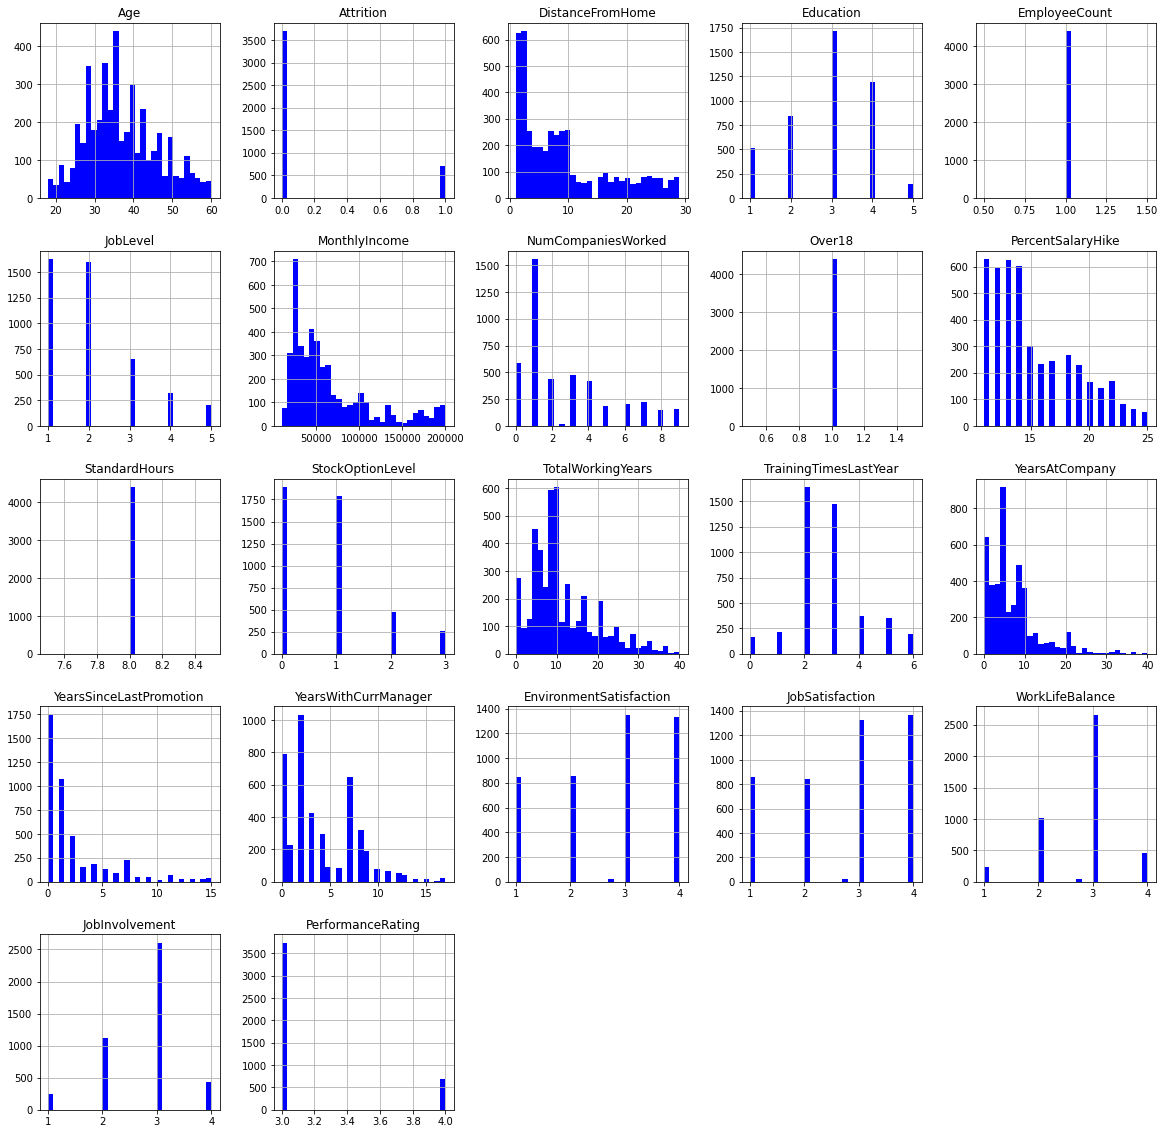

In [21]:
employee_df.hist(bins = 30, figsize = (20,20), color = 'b')

**We can see from the above histogram that several features such as "MonthlyIncome" and TotalWorkingYears" are tail heavy and it also make sense to drop "EmployeeCount","Standardhours" and "Over18" since they do not change from one employee to others.**

**So dropping the "Employeecount","Standardhours"and "Over18".**

In [22]:
employee_df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

In [23]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,11,0,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,23,1,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,15,3,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,11,3,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,12,2,9.0,2,6,0,4,4.0,1.0,3.0,3,3


**Let's see how many employees left the company!**

In [24]:
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [25]:
print("Total =", len(employee_df))

print("Number of employees who left the company =", len(left_df))
print("Percentage of employees who left the company =", 1.*len(left_df)/len(employee_df)*100.0, "%")
 
print("Number of employees who did not leave the company (stayed) =", len(stayed_df))
print("Percentage of employees who did not leave the company (stayed) =", 1.*len(stayed_df)/len(employee_df)*100.0, "%")

Total = 4410
Number of employees who left the company = 711
Percentage of employees who left the company = 16.122448979591837 %
Number of employees who did not leave the company (stayed) = 3699
Percentage of employees who did not leave the company (stayed) = 83.87755102040816 %


**It seems that data is highly imbalanced...When the target classes doesnot have equal count then the data is conidered as
imbalanced data...Also we can see that**
**almost 16% employees left the organization.**

**Let's compare the mean and standard deviation of the employees who stayed and left.**

In [26]:
left_df.describe()

,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,711.000000,711.0,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,33.607595,1.0,9.012658,2.877637,2.037975,61682.616034,2.934992,15.481013,0.780591,8.263797,2.654008,5.130802,1.945148,2.852321,2.470630,2.470785,2.661105,2.704641,3.172996
std,9.675693,0.0,7.772368,1.014233,1.057485,44792.067695,2.671279,3.775289,0.858899,7.155717,1.154834,5.941598,3.148633,3.138918,1.162887,1.115161,0.814109,0.761739,0.378510
min,18.000000,1.0,1.000000,1.000000,1.000000,10090.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,28.000000,1.0,2.000000,2.000000,1.000000,28440.000000,1.000000,12.000000,0.000000,3.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,3.000000
50%,32.000000,1.0,7.000000,3.000000,2.000000,49080.000000,1.000000,14.000000,1.000000,7.000000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,39.000000,1.0,15.000000,4.000000,2.000000,71040.000000,5.000000,18.000000,1.000000,10.000000,3.000000,7.000000,2.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000
max,58.000000,1.0,29.000000,5.000000,5.000000,198590.000000,9.000000,25.000000,3.000000,40.000000,6.000000,40.000000,15.000000,14.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [27]:
stayed_df.describe()

,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,3699.000000,3699.0,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000,3699.000000
mean,37.561233,0.0,9.227088,2.919708,2.068938,65672.595296,2.648668,15.157340,0.796431,11.859681,2.827251,7.369019,2.234388,4.367397,2.772228,2.777734,2.780722,2.734793,3.150041
std,8.885956,0.0,8.167978,1.025784,1.115967,47472.814021,2.455544,3.634551,0.850621,7.755226,1.311493,6.094649,3.233887,3.593144,1.068329,1.088768,0.678232,0.701315,0.357159
min,18.000000,0.0,1.000000,1.000000,1.000000,10510.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,31.000000,0.0,2.000000,2.000000,1.000000,29360.000000,1.000000,12.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,0.0,7.000000,3.000000,2.000000,49300.000000,2.000000,14.000000,1.000000,10.000000,3.000000,6.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,0.0,14.000000,4.000000,3.000000,86060.000000,4.000000,18.000000,1.000000,16.000000,3.000000,10.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,0.0,29.000000,5.000000,5.000000,199990.000000,9.000000,25.000000,3.000000,38.000000,6.000000,37.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


**-->'age': mean age of the employees who stayed is higher compared to who left.**

**-->'DistanceFromHome': Employees who stayed live closer to home.**

**-->'EnvironmentSatisfaction'&'JobSatisfaction': Employees who stayed are generally more satisfied with their jobs.**

**-->'StockOptionLevel': Employees who stayed tend to have higher stock option level.**

C:\Users\user\AppData\Local\Temp/ipykernel_27040/1709660398.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = employee_df.corr()


<Axes: >

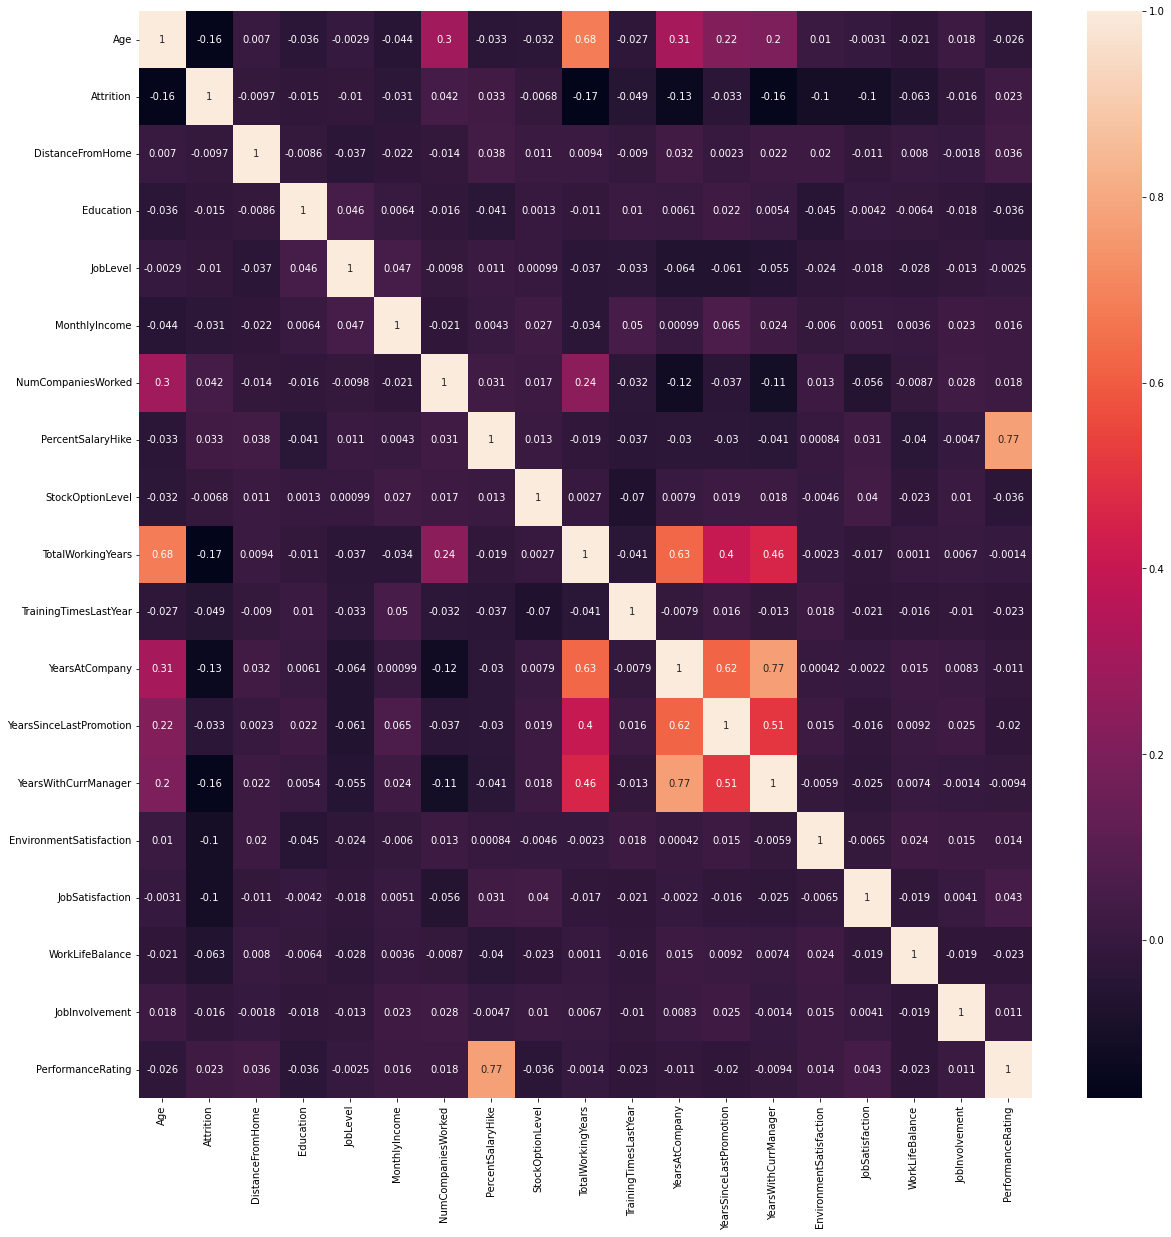

In [28]:
correlations = employee_df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

**From correlation plot that we shown above,we can draw the following insights.**

**--> JobLevel is strongly correlated with the total working hours.**

**--> MonthlyIncome is strongly correlated with the JobLevel.**

**--> MonthlyIncome is strongly correlated with the total working hours.**

**-->Age is strongly correlated with monthly income.**





**Age vs Attrition Analysis:**

**People of age of 29 and 31 years left the company more frequently. Although the number of 
employees in age group of 18 to 23 is less but the attrition rate is also high in this group. Also, as 
age increases the chances of leaving the company decreases.**

<Axes: xlabel='Age', ylabel='count'>

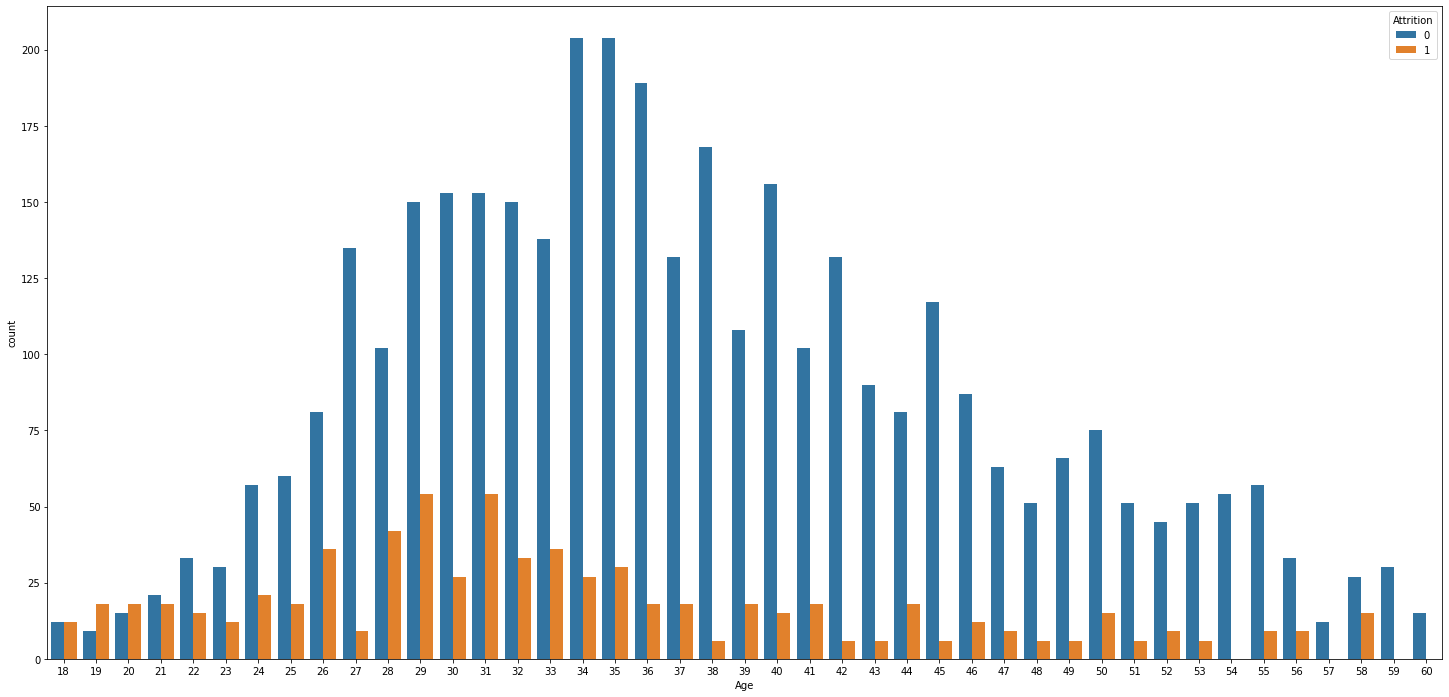

In [29]:
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue = 'Attrition', data = employee_df)

<Axes: xlabel='Gender', ylabel='count'>

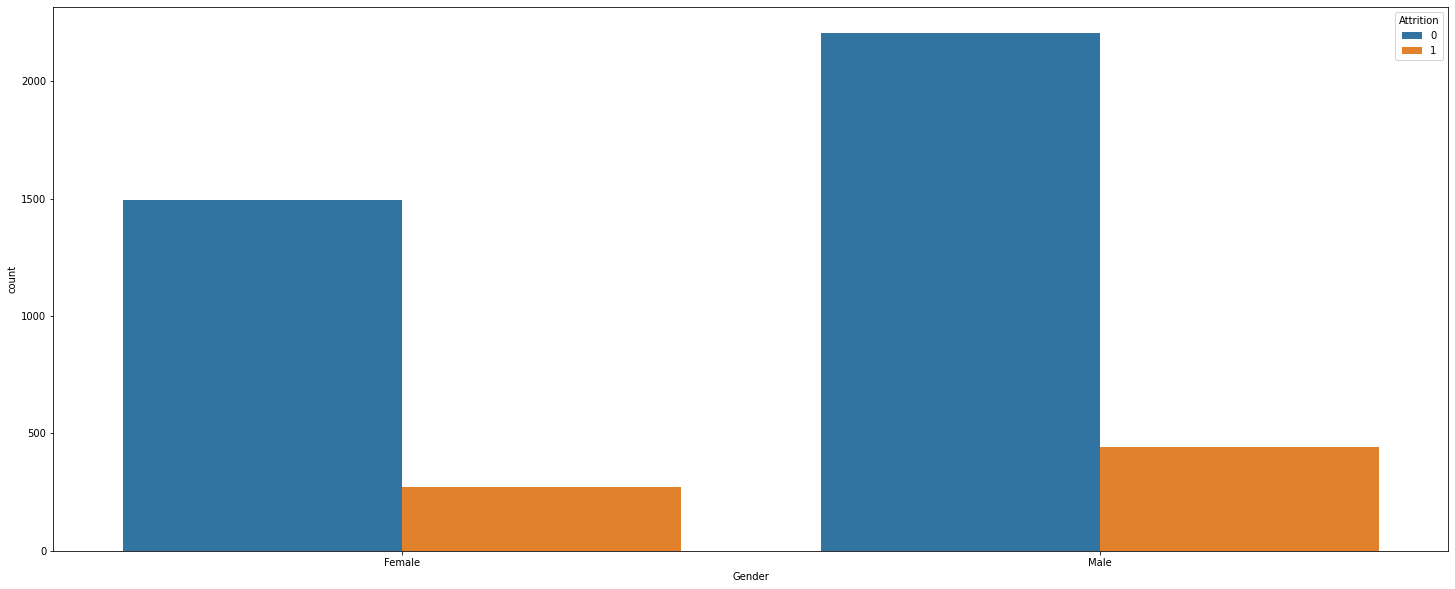

In [30]:
plt.figure(figsize=[25, 10])
sns.countplot(x = 'Gender', hue = 'Attrition', data = employee_df)

<Axes: xlabel='JobSatisfaction', ylabel='count'>

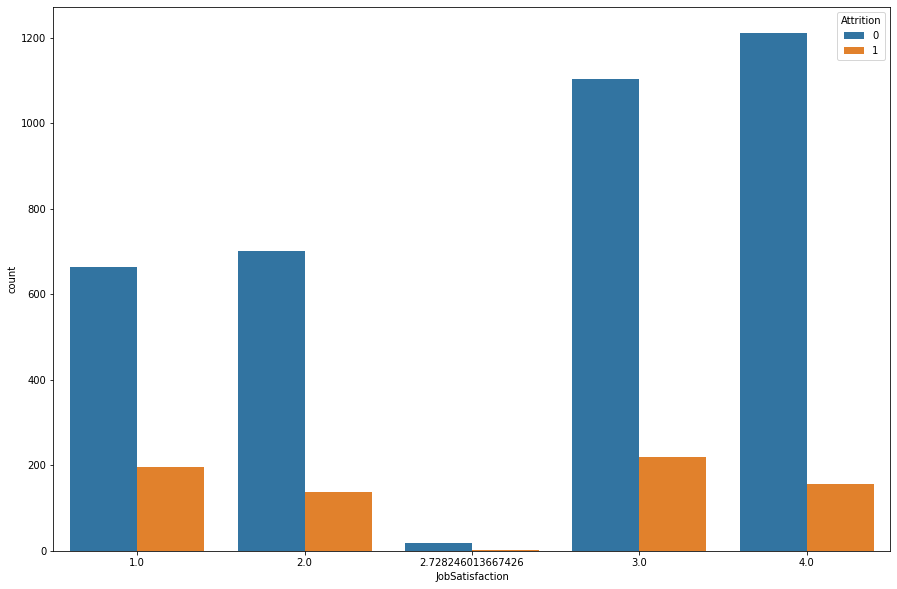

In [31]:
plt.figure(figsize=[15, 10])
sns.countplot(x = 'JobSatisfaction', hue = 'Attrition', data = employee_df)

<Axes: xlabel='WorkLifeBalance', ylabel='count'>

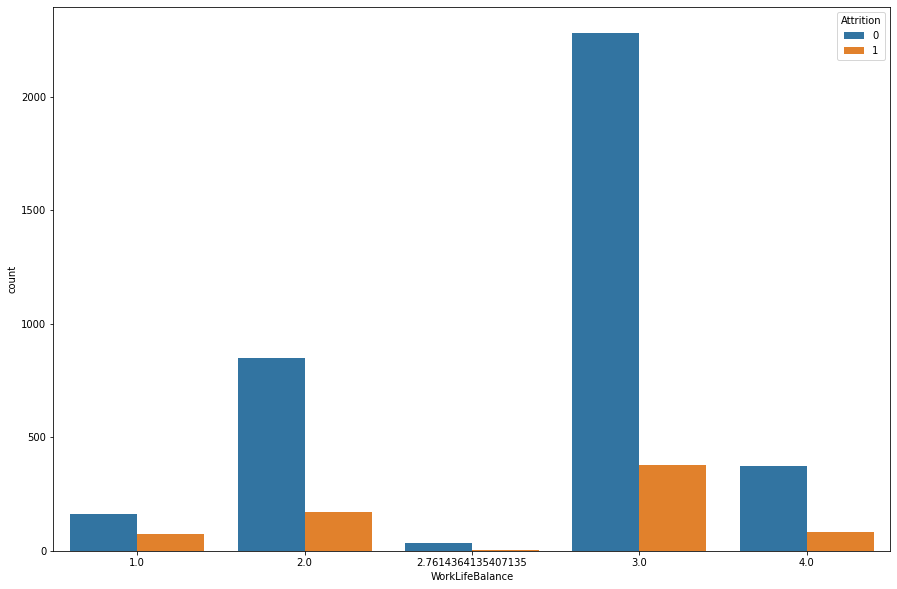

In [32]:
plt.figure(figsize=[15, 10])
sns.countplot(x = 'WorkLifeBalance', hue = 'Attrition', data = employee_df)

<Axes: xlabel='JobLevel', ylabel='count'>

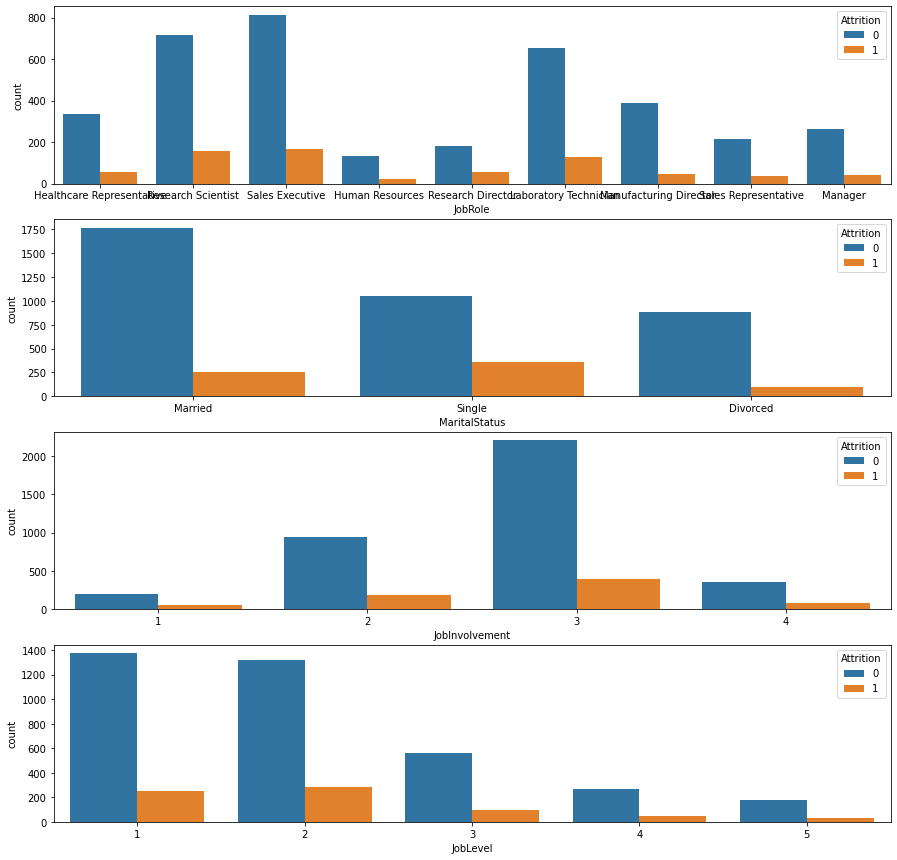

In [33]:
plt.figure(figsize=[15,15])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = employee_df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = employee_df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = employee_df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = employee_df)


# Single employees tend to leave compared to married and divorced
# Sales Representitives tend to leave compared to any other job 
# Less involved employees tend to leave the company 
# Less experienced (low job level) tend to leave the company 



**Now using KDE (Kernel Density Estimate), it is used for visualizing the Probability Density of a 
continuous variable and it describes the probability density at different values in a continuous variable.**


**Distance from Home vs Attrition:**

**People staying far (more than 10km) from office more likely to leave company. We can notice 
the red line is above the blue line after 10 in the x-axis i.e. Distance from Home**

C:\Users\user\AppData\Local\Temp/ipykernel_27040/1589361210.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
C:\Users\user\AppData\Local\Temp/ipykernel_27040/1589361210.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')


Text(0.5, 0, 'Distance From Home')

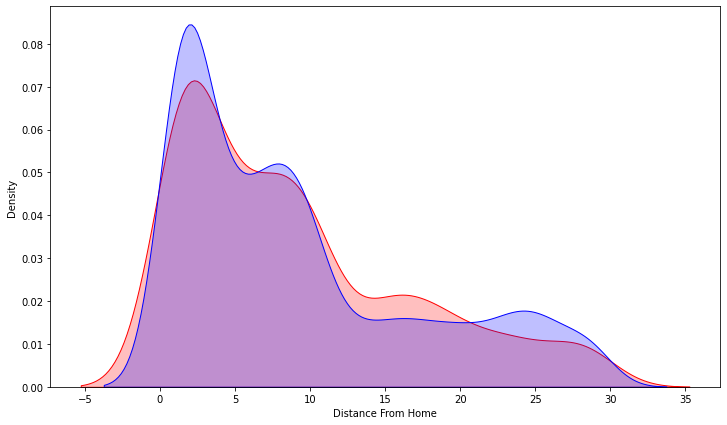

In [34]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Distance From Home')



**Years with Current manager vs Attrition:**

**Employee with small span of time with Current manager are more likely to leave the company. 
We can notice the red line is above the blue line at the starting of x-axis i.e., Years with Current 
manager. However, as we increase the number of years, the blue line tends to supersede the red 
line, which means that as we go beyond 4 to 15 years, the number of employees who actually 
tend to stay is more than the number of employees who actually leaves the company.**

C:\Users\user\AppData\Local\Temp/ipykernel_27040/1029930472.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
C:\Users\user\AppData\Local\Temp/ipykernel_27040/1029930472.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')


Text(0.5, 0, 'Years With Current Manager')

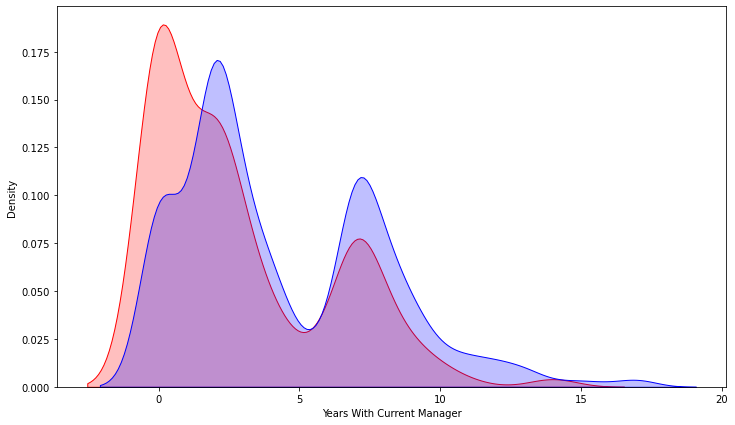

In [35]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Years With Current Manager')

**Total Working Years vs Attrition:**

**Employees with a smaller number of years (0 to 6 years) with the company tend to leave the 
company. We can notice the red line is above blue line at the starting of x-axis i.e., Total 
Working Years. However, as we go beyond 6 years, we will find that the blue line tends to 
supersede which means the employees tend to stay as we increase the total working years.**

C:\Users\user\AppData\Local\Temp/ipykernel_27040/3858665175.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
C:\Users\user\AppData\Local\Temp/ipykernel_27040/3858665175.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')


Text(0.5, 0, 'Total Working Years')

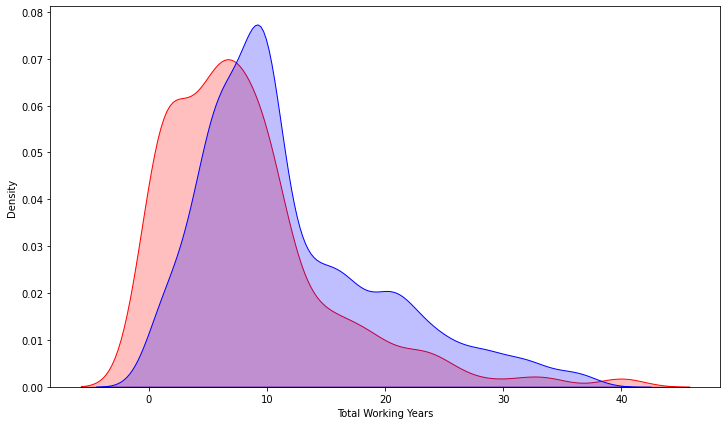

In [36]:
plt.figure(figsize=(12,7))

sns.kdeplot(left_df['TotalWorkingYears'], shade = True, label = 'Employees who left', color = 'r')
sns.kdeplot(stayed_df['TotalWorkingYears'], shade = True, label = 'Employees who Stayed', color = 'b')

plt.xlabel('Total Working Years')


**Gender vs Monthly Income:**

**We can see that the average salary is almost quite comparable between male and female, that’s 
actually a great thing. Gender pay equality is actually critical and very important thing for any 
company.**


<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

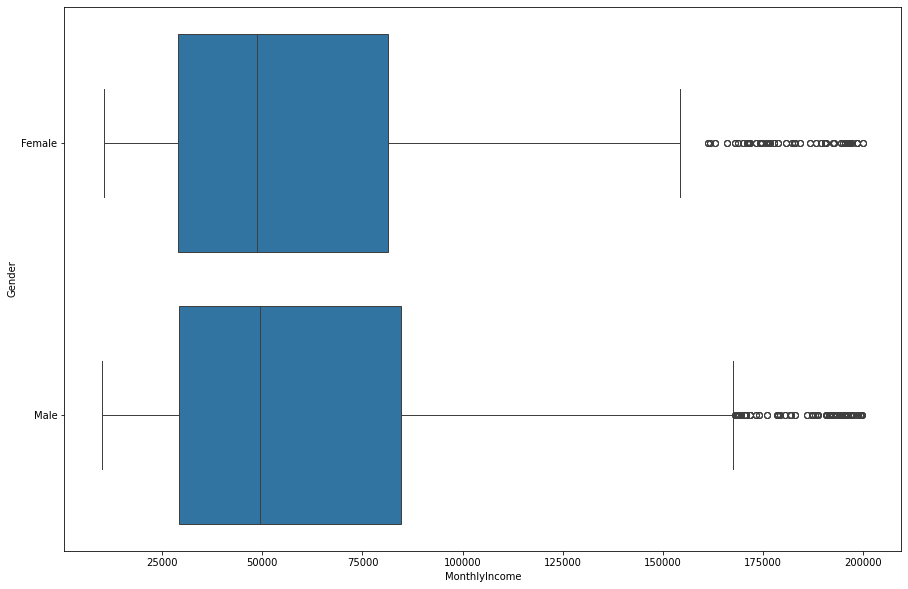

In [37]:
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = employee_df)